<a href="https://colab.research.google.com/github/oluwamark/compx310/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/16sztHJgfBy6JswfoIeADrmTbZnSZFGdB?usp=sharing

##Part 1


In [ ]:
# Imports the pandas and numpy libraries. Gets breast cancer data from github
# and displays it
import pandas as pd   # data analysis library
import numpy as np    # math library

url = "https://raw.githubusercontent.com/bpfa/data_for_compx310_2023/main/wisconsin_breast_cancer.csv"

# reads the csv data from the specified url
bc = pd.read_csv(url)
# displays the data in the csv
bc

,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,0
695,841769,2,1,1,1,2,1.0,1,1,1,0
696,888820,5,10,10,3,7,3.0,8,10,2,1
697,897471,4,8,6,4,3,4.0,10,6,1,1


In [ ]:
# displays csv metadata
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         699 non-null    int64  
 1   thickness  699 non-null    int64  
 2   size       699 non-null    int64  
 3   shape      699 non-null    int64  
 4   adhesion   699 non-null    int64  
 5   single     699 non-null    int64  
 6   nuclei     683 non-null    float64
 7   chromatin  699 non-null    int64  
 8   nucleoli   699 non-null    int64  
 9   mitosis    699 non-null    int64  
 10  class      699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


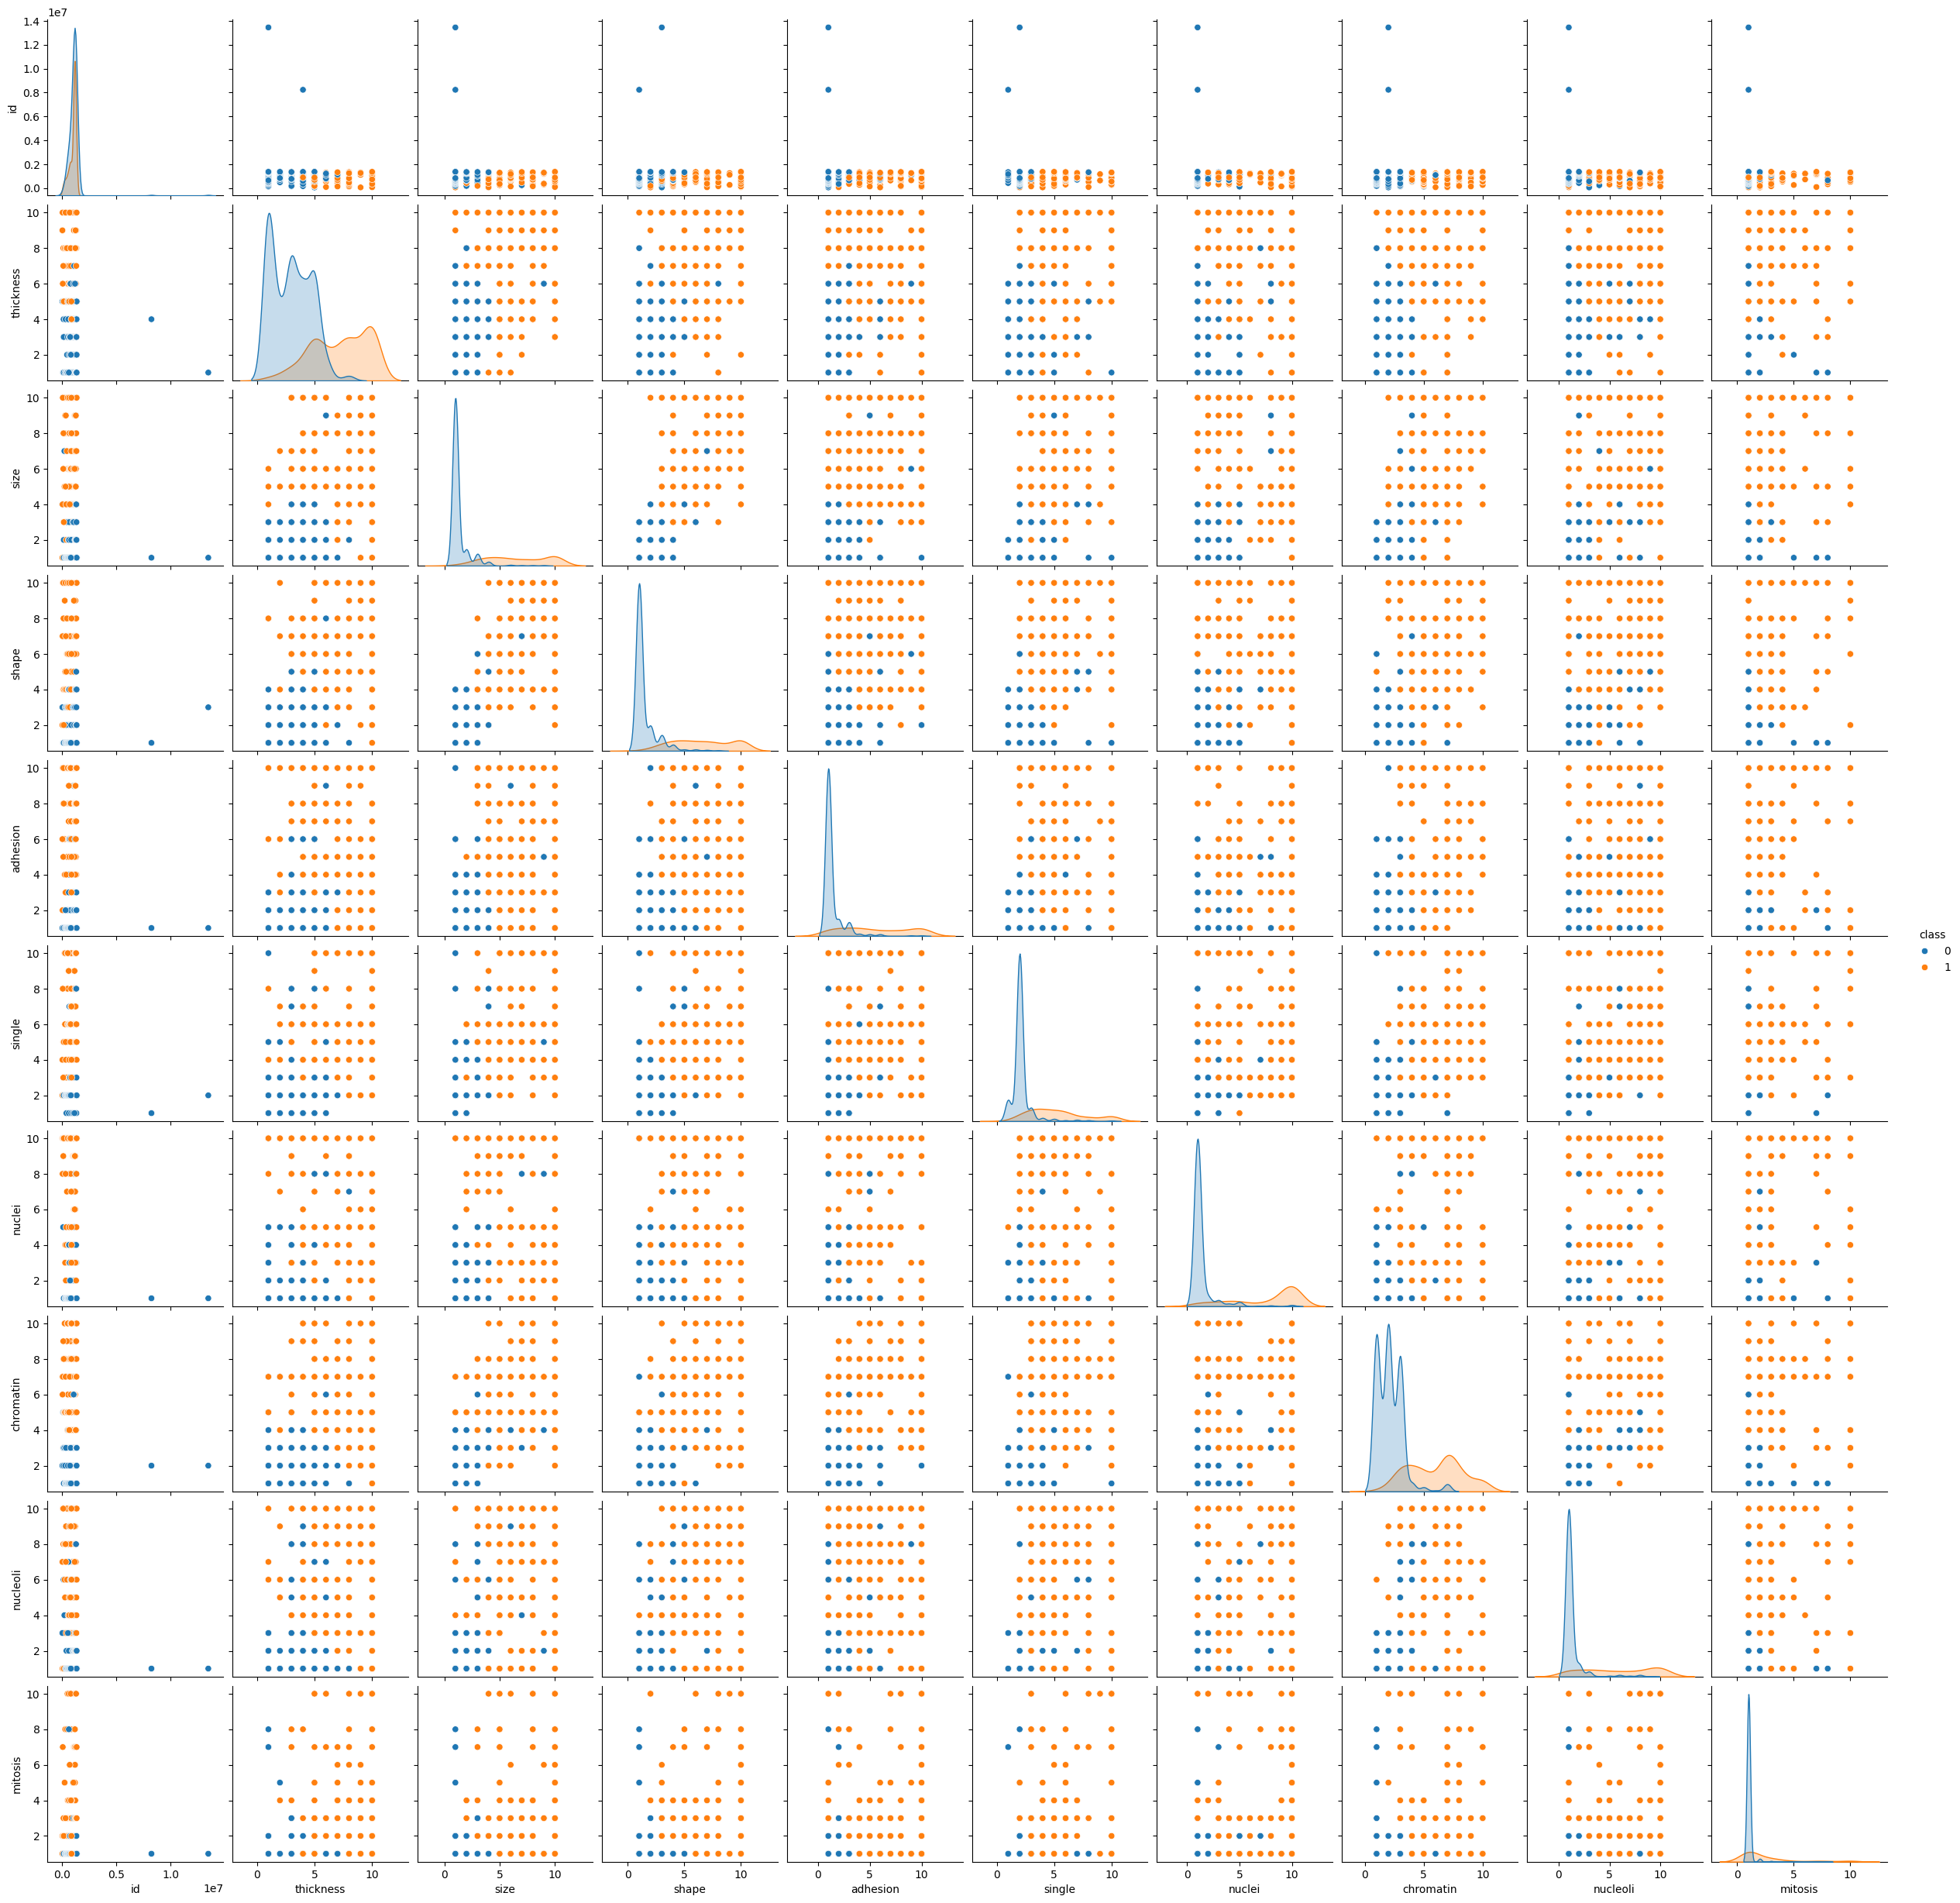

In [ ]:
# seaborn is as statistical data visualisation library
import seaborn as sns
# this will display the data in colours depending on the value of 'class.
# Class, in this dataset, takes a boolean value depending on whether the tumor
# is malignant or not
sns.pairplot(bc, hue='class')

##Part 2

In [ ]:
from sklearn.model_selection import train_test_split

# https://www.w3schools.com/python/pandas/ref_df_drop.asp
# us dropna() to remove rows with NaN values
bc = bc.dropna()
# making new dataframes for X and y. Want to remove the id and class columns from the predictor variables
X = bc.drop(['id','class'], axis=1)
y = bc['class']

In [ ]:
# splitting the data into training and test groups (reserving 20% for testing)
# the stratify parameter is used to ensure the data is split in a way which preserves the proportions of classes in the training and testing subsets
# Medical screening may result in significantly more negative results than positive. It is important that the test and training groups have equal
# proportions of positive/negative screening results, so a stratified split is used.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1631625, stratify=y)

https://builtin.com/data-science/train-test-split

https://medium.com/@aymuosmukherjee/why-do-we-use-stratify-in-train-test-split-e3eb296a5494

https://scikit-learn.org/stable/modules/cross_validation.html#stratification

In [ ]:
# displaying the dataframe sizes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((546, 9), (137, 9), (546,), (137,))

Troubleshooting

In [ ]:
# error found earlier where the X dataframe contained NaN values, need to remove
# them, and the corresponding Y values
print(X_train.isnull().values.any())
print(X_test.isnull().values.any())
print(y_train.isnull().values.any())
print(y_test.isnull().values.any())

False
False
False
False


In [ ]:
# on every row in X where there is a NaN value, I need to remove that row, and
# delete the corresponding y value
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
# X_train = X_train.dropna()
# y_train = y_train.loc[X_train.index]

# X_test = X_test.dropna()
# y_test = y_test.loc[X_test.index]

# X_train.shape, X_test.shape, y_train.shape, y_test.shape

The above code didn't work because it changes the relative size of the test + train datasets (which likely won't preserve the 80/20 split established earlier). For example, if the rows containing NaN values were all in the test group, performing .dropna() would significantly reduce the relative size of the test group (ie no longer an 80/20 split).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Test Accuracy (k=5): {accuracy_score(y_test, y_pred)}")

Test Accuracy (k=5): 0.9635036496350365


The *accuracy_score* method compares predicted values with true values.The model is 96.4% (1dp) accurate. The formula for this metric is (TP+TN)/(TP+TN+FP+FN)

Source: https://www.geeksforgeeks.org/machine-learning/difference-between-score-and-accuracy_score-methods-in-scikit-learn/
https://www.geeksforgeeks.org/machine-learning/confusion-matrix-machine-learning/

##Part 3

In [ ]:
# confusion_matrix
# https://www.geeksforgeeks.org/machine-learning/confusion-matrix-machine-learning/
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[86  3]
 [ 2 46]]


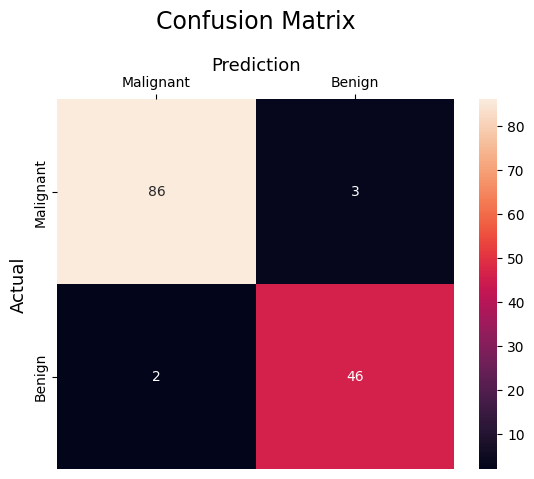

In [ ]:
# https://www.geeksforgeeks.org/machine-learning/confusion-matrix-machine-learning/
# code from above link. labels changed for breast cancer dataset
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Malignant','Benign'],
            yticklabels=['Malignant','Benign'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.show()

The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives. My model produced 86 true negatives, 46 true negatives, 3 false negatives, and 2 false positives.

In [ ]:
# classification report
# https://scikit-learn.org/0.15/modules/generated/sklearn.metrics.classification_report.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
# https://www.geeksforgeeks.org/machine-learning/compute-classification-report-and-confusion-matrix-in-python/

target_names = ['benign', 'malignant']
print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

      benign       0.98      0.97      0.97        89
   malignant       0.94      0.96      0.95        48

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



**Accuracy** shows how many predictions the model got correct out of all the predictions. In multi-class models, the accuracy can be misleading if one class is dominant. Ie it may accurately predict the dominant class but fail to capture detail about other classes.

**Precision** provides information on the quality of the model's positive predictions (ie when the model predicts a positive (malignant growth)). It tells us how many of the positive predictions were actually correct. Precision is important for situations where false negativies need to be avoided. Formula (True positve / (true positive + false positive)).

**Recall** shows the proportion of true positives detected out of all the positive instances (True positve / (true positive + false negative)). High recall is important in situations where missing a true positive has significant consequences (as in the context of breast cancer diagnosis) .

**F1-Score** a combination of precision and recall (harmonic mean). Gives a better sense of a model's overall accuracy. The caveat is that some contexts may require precision and not high recall or vice versa.

**Specificity**This metric is particulary useful in the evaluation of binary classification models. Measures the ability to correctly identify negative instances (TN/(TN+FP)). It is also called the True Negative Rate Formula


##Part 4


In [ ]:
# using a for loop to test prediction accuracy for k=1 to k=100
# intialise list
accuracies =[]

for i in range(100):
  knn = KNeighborsClassifier(n_neighbors=i+1)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)

  # append accuracy score
  accuracies.append(accuracy_score(y_test, y_pred))
  print(f"Test Accuracy k={i+1}: {accuracy_score(y_test, y_pred)}")

Test Accuracy k=1: 0.9562043795620438
Test Accuracy k=2: 0.9416058394160584
Test Accuracy k=3: 0.9562043795620438
Test Accuracy k=4: 0.9635036496350365
Test Accuracy k=5: 0.9635036496350365
Test Accuracy k=6: 0.9635036496350365
Test Accuracy k=7: 0.9635036496350365
Test Accuracy k=8: 0.9635036496350365
Test Accuracy k=9: 0.9635036496350365
Test Accuracy k=10: 0.9635036496350365
Test Accuracy k=11: 0.9635036496350365
Test Accuracy k=12: 0.9635036496350365
Test Accuracy k=13: 0.9635036496350365
Test Accuracy k=14: 0.9635036496350365
Test Accuracy k=15: 0.9708029197080292
Test Accuracy k=16: 0.9635036496350365
Test Accuracy k=17: 0.9708029197080292
Test Accuracy k=18: 0.9635036496350365
Test Accuracy k=19: 0.9708029197080292
Test Accuracy k=20: 0.9635036496350365
Test Accuracy k=21: 0.9635036496350365
Test Accuracy k=22: 0.9635036496350365
Test Accuracy k=23: 0.9635036496350365
Test Accuracy k=24: 0.9635036496350365
Test Accuracy k=25: 0.9635036496350365
Test Accuracy k=26: 0.963503649635

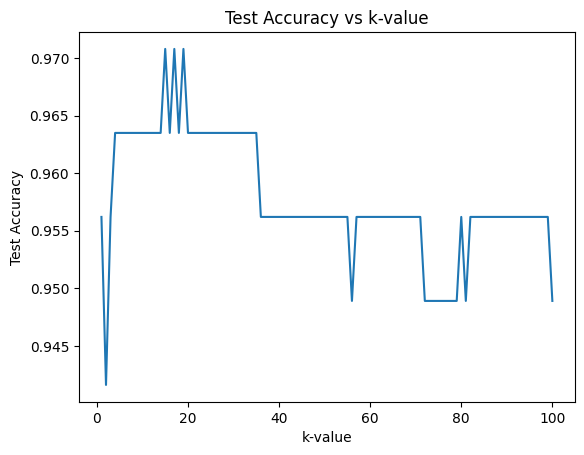

In [ ]:
# printing test accuracy against k-value
# https://www.w3schools.com/python/matplotlib_labels.asp
# https://www.w3schools.com/python/python_ml_scatterplot.asp
import matplotlib.pyplot as plt

# https://www.geeksforgeeks.org/python/range-to-a-list-in-python/
x = range(1, 101)

# constructing the graph
plt.plot(x, accuracies, linestyle='-')
plt.xlabel('k-value')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs k-value')
plt.show()

In [ ]:
for index,value in enumerate(accuracies):
  if value == max(accuracies):
    print(f"Max at k={index+1}")

Max at k=15
Max at k=17
Max at k=19


The "**Test Accuracy vs k-value**" graph indicates the highest model accuracy occurs at (approximately) k between 10 and 20. Using the data from above, the highest accuracies occur at k=15, 17, 19.

Using a **small k-value** can make the model sensitive to noise and will likely lead to overfitting in this case. This is because the algorithm won't consider enough neighbours to capture the global distribution. Using a **large k-value** will make the model more tolerant to noise but can lead to underfitting. Underfitting will occur, in this case, because the model may obscure local patterns in data by considering too many neighbours.





Sources: https://www.geeksforgeeks.org/machine-learning/how-to-find-the-optimal-value-of-k-in-knn/
https://www.geeksforgeeks.org/machine-learning/k-nearest-neighbours/


###converting to pdf

In [ ]:

!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab_Notebooks/Lab1.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab_Notebooks/Lab1.ipynb to pdf
